In [1]:
import duckdb
import pandas as pd

In [2]:
def run_query(query):
    with duckdb.connect('taxi.db') as con:
        result = con.execute(query)
        return result.fetchdf()
     

In [4]:
run_query("select * from taxi_data limit 5") 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
df = run_query("SELECT VendorID, count(*) as qtd, sum(total_amount) as total FROM taxi_data group by 1 order by 2 desc LIMIT 10") 

In [6]:
df

,VendorID,qtd,total
0,2,43672618,1.243217e+09
1,1,14959785,4.045463e+08
2,6,9916,4.502207e+05


<Axes: xlabel='VendorID'>

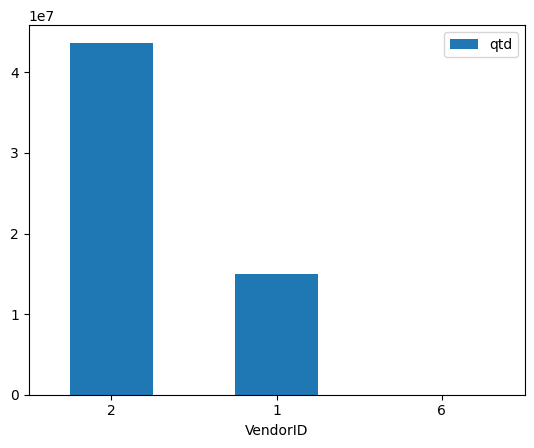

In [7]:
df.plot.bar(x='VendorID', y='qtd', rot=0)

<Axes: xlabel='VendorID'>

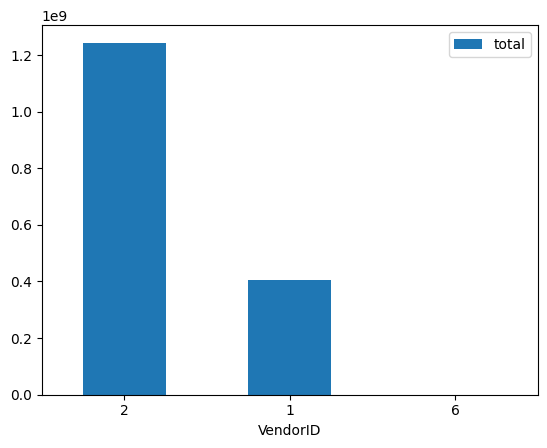

In [8]:
df.plot.bar(x='VendorID', y='total', rot=0)

In [11]:
df = run_query("SELECT strftime(tpep_pickup_datetime, '%Y-%m') as mes, sum(total_amount) as total FROM taxi_data  where mes > '2022-12'group by 1 order by 1 ") 

In [14]:
df

,mes,total
0,2023-01,8.286359e+07
1,2023-02,7.838160e+07
2,2023-03,9.463403e+07
3,2023-04,9.295684e+07
4,2023-05,1.017660e+08
5,2023-06,9.613736e+07
6,2023-07,8.305003e+07
7,2023-08,8.085131e+07
8,2023-09,8.478140e+07
9,2023-10,1.027491e+08


In [15]:
run_query("SELECT * from df ") 

,mes,total
0,2023-01,8.286359e+07
1,2023-02,7.838160e+07
2,2023-03,9.463403e+07
3,2023-04,9.295684e+07
4,2023-05,1.017660e+08
5,2023-06,9.613736e+07
6,2023-07,8.305003e+07
7,2023-08,8.085131e+07
8,2023-09,8.478140e+07
9,2023-10,1.027491e+08


<Axes: xlabel='mes'>

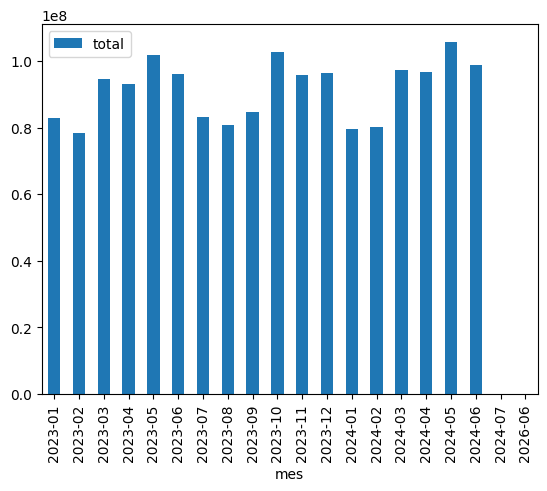

In [13]:
df.plot.bar(x='mes', y='total' )

In [ ]:
duckdb.execute("COPY df TO 'output_result.parquet' (FORMAT PARQUET)")

In [ ]:
duckdb.execute("COPY df TO 'output_result.csv' ")

In [ ]:
pd.read_parquet('output_result.parquet')

,mes,total
0,2023-01,8.286359e+07
1,2023-02,7.838160e+07
2,2023-03,9.463403e+07
3,2023-04,9.295684e+07
4,2023-05,1.017660e+08
5,2023-06,9.613736e+07
6,2023-07,8.305003e+07
7,2023-08,8.085131e+07
8,2023-09,8.478140e+07
9,2023-10,1.027491e+08


# Relational API

In [19]:
#duck_con = duckdb.connect('taxi.db')
with duckdb.connect('taxi.db') as con:
    data = con.table('taxi_data')


In [21]:
with duckdb.connect('taxi.db') as con:
    data = con.table('taxi_data')
    data.show()

┌──────────┬──────────────────────┬───────────────────────┬─────────────────┬───────────────┬────────────┬────────────────────┬──────────────┬──────────────┬──────────────┬─────────────┬────────┬─────────┬────────────┬──────────────┬───────────────────────┬──────────────┬──────────────────────┬─────────────┐
│ VendorID │ tpep_pickup_datetime │ tpep_dropoff_datetime │ passenger_count │ trip_distance │ RatecodeID │ store_and_fwd_flag │ PULocationID │ DOLocationID │ payment_type │ fare_amount │ extra  │ mta_tax │ tip_amount │ tolls_amount │ improvement_surcharge │ total_amount │ congestion_surcharge │ airport_fee │
│  int64   │      timestamp       │       timestamp       │     double      │    double     │   double   │      varchar       │    int64     │    int64     │    int64     │   double    │ double │ double  │   double   │    double    │        double         │    double    │        double        │   double    │
├──────────┼──────────────────────┼───────────────────────┼───────────

In [22]:
with duckdb.connect('taxi.db') as con:
    data = con.table('taxi_data')
    data.filter('VendorID = 1').show()

┌──────────┬──────────────────────┬───────────────────────┬─────────────────┬───────────────┬────────────┬────────────────────┬──────────────┬──────────────┬──────────────┬─────────────┬────────┬─────────┬────────────┬──────────────┬───────────────────────┬──────────────┬──────────────────────┬─────────────┐
│ VendorID │ tpep_pickup_datetime │ tpep_dropoff_datetime │ passenger_count │ trip_distance │ RatecodeID │ store_and_fwd_flag │ PULocationID │ DOLocationID │ payment_type │ fare_amount │ extra  │ mta_tax │ tip_amount │ tolls_amount │ improvement_surcharge │ total_amount │ congestion_surcharge │ airport_fee │
│  int64   │      timestamp       │       timestamp       │     double      │    double     │   double   │      varchar       │    int64     │    int64     │    int64     │   double    │ double │ double  │   double   │    double    │        double         │    double    │        double        │   double    │
├──────────┼──────────────────────┼───────────────────────┼───────────

In [23]:
with duckdb.connect('taxi.db') as con:
    data = con.table('taxi_data')
    data.filter('VendorID = 1').project('VendorID', 'total_amount').show()

┌──────────┬──────────────┐
│ VendorID │ total_amount │
│  int64   │    double    │
├──────────┼──────────────┤
│        1 │        20.85 │
│        1 │        46.55 │
│        1 │         29.5 │
│        1 │         13.6 │
│        1 │         20.6 │
│        1 │        17.15 │
│        1 │        95.15 │
│        1 │         13.6 │
│        1 │         16.4 │
│        1 │         22.2 │
│        · │           ·  │
│        · │           ·  │
│        · │           ·  │
│        1 │        31.05 │
│        1 │         14.1 │
│        1 │        28.55 │
│        1 │         12.6 │
│        1 │         33.6 │
│        1 │         81.8 │
│        1 │         19.6 │
│        1 │         11.2 │
│        1 │         12.6 │
│        1 │         67.4 │
├──────────┴──────────────┤
│ ? rows        2 columns │
└─────────────────────────┘

